In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from fasteda import fast_eda
from scipy import stats

# Import and read dataset

In [2]:
path=os.getcwd()
file_name='Spotify_Refined_Explicity_classifed.csv'

In [3]:
df=pd.read_csv(path+os.sep+file_name, encoding="ISO-8859-1")
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Explicit Classified
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,1
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1,1


In [4]:
df.shape

(4600, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

# Data cleaning

# Checking missing values

<AxesSubplot:>

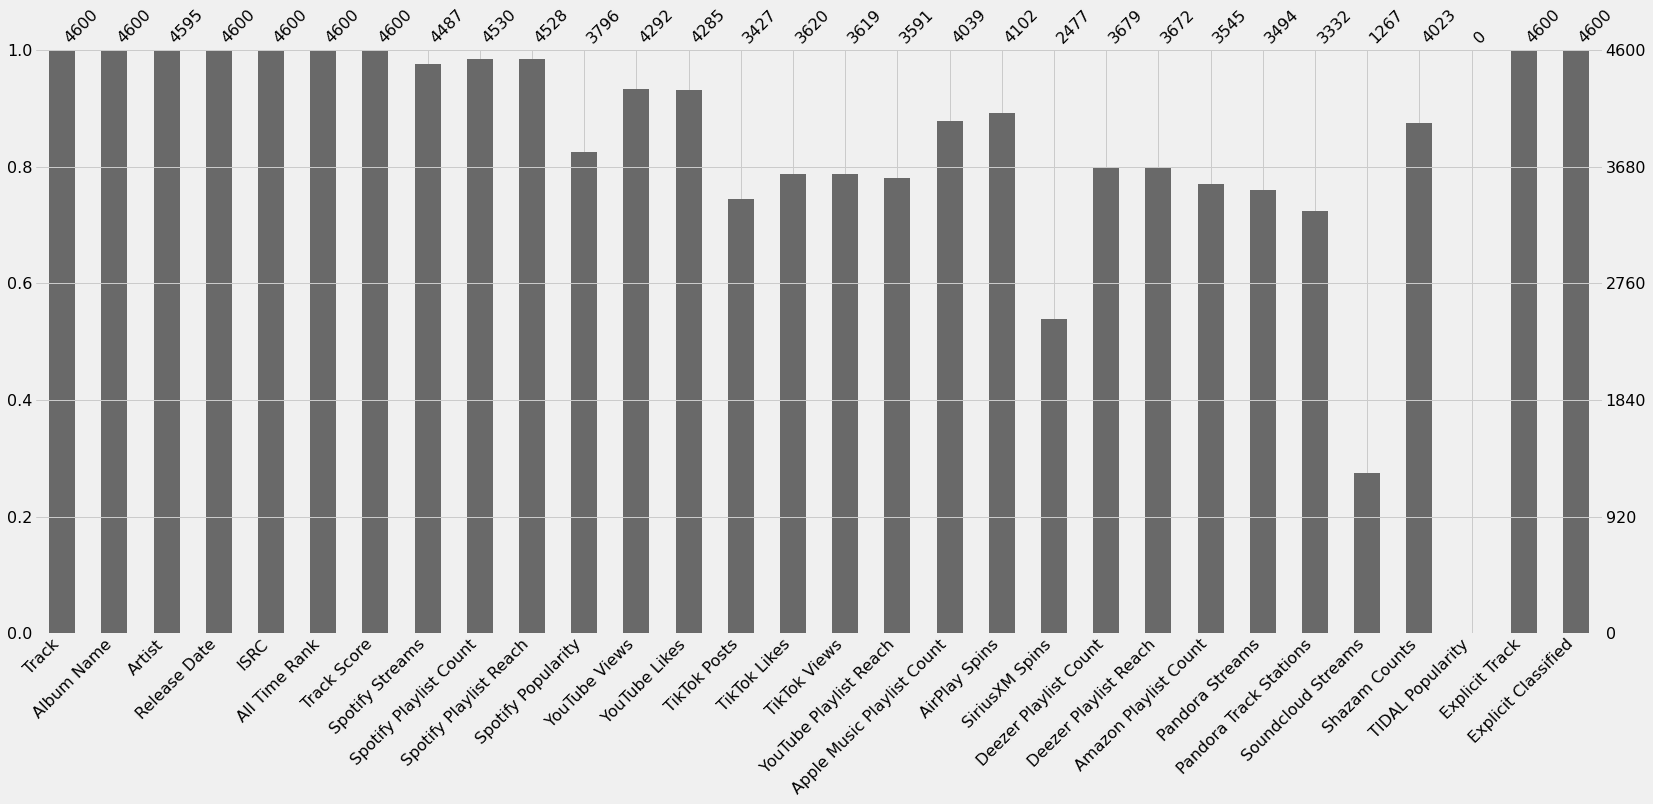

In [6]:
msno.bar(df)

<AxesSubplot:>

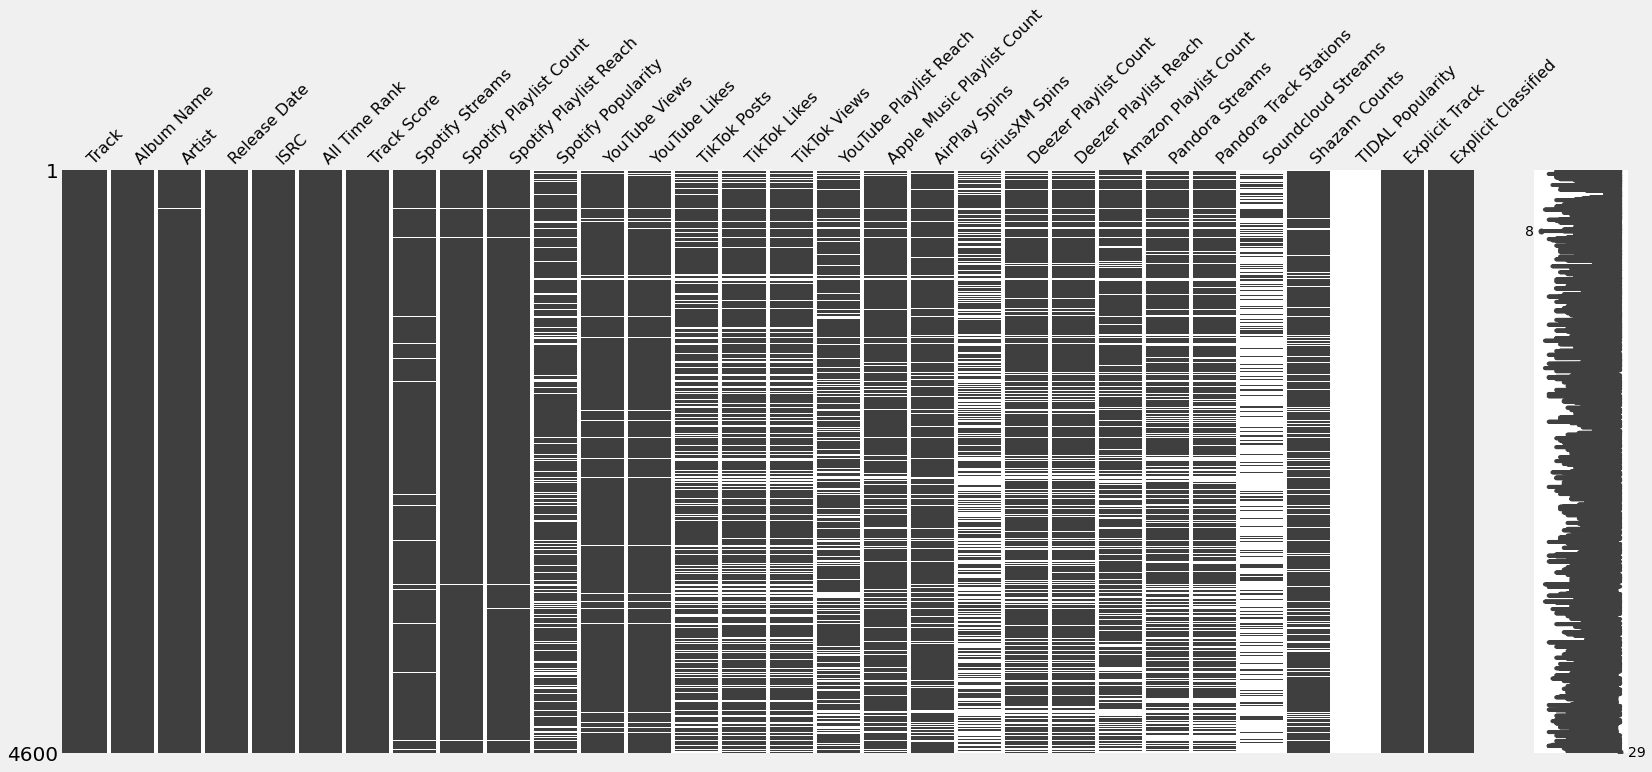

In [7]:
msno.matrix(df)

In [8]:
df.isna().sum().sort_values(ascending=False)

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
Explicit Track                   0
Track                            0
Album Name                       0
Track Score                      0
All Time Rank                    0
ISRC                             0
Release Date        

# Drop useless columns

In [9]:
df.drop(['TIDAL Popularity','ISRC','All Time Rank','AirPlay Spins','SiriusXM Spins','Pandora Track Stations','Pandora Streams'
         ,'Soundcloud Streams','YouTube Playlist Reach','Deezer Playlist Reach','Explicit Track']
        ,axis=1,inplace=True)
#this dataset has been updated with Explicit Classified label

In [10]:
len(df.columns)

19

In [11]:
df.isna().sum().sort_values(ascending=False)

TikTok Posts                  1173
Amazon Playlist Count         1055
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
Track                            0
Album Name                       0
Track Score                      0
Release Date                     0
Explicit Classified              0
dtype: int64

<AxesSubplot:>

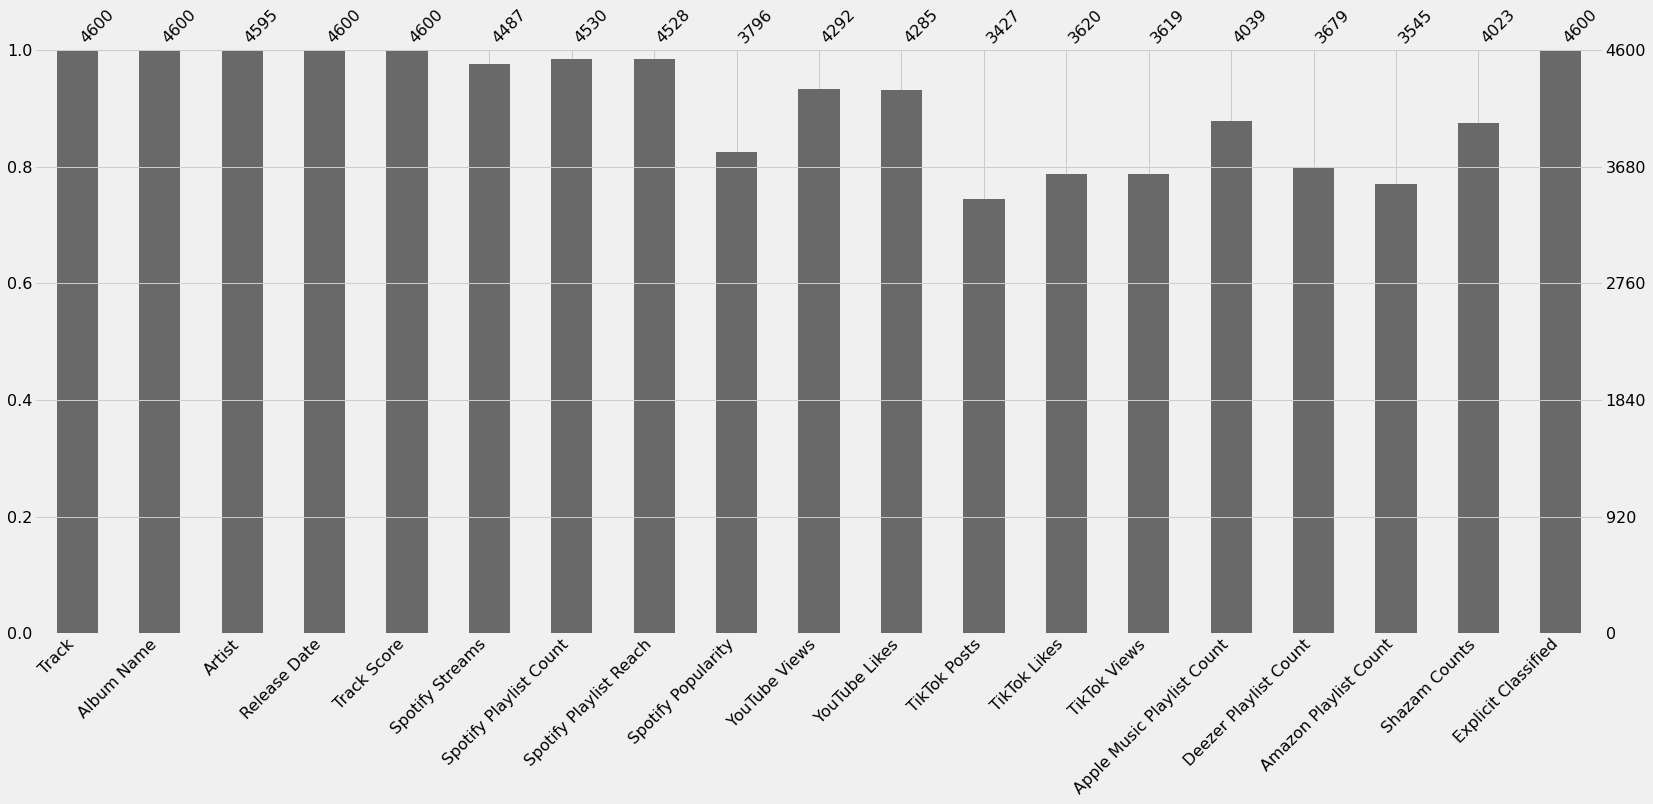

In [12]:
msno.bar(df)

<AxesSubplot:>

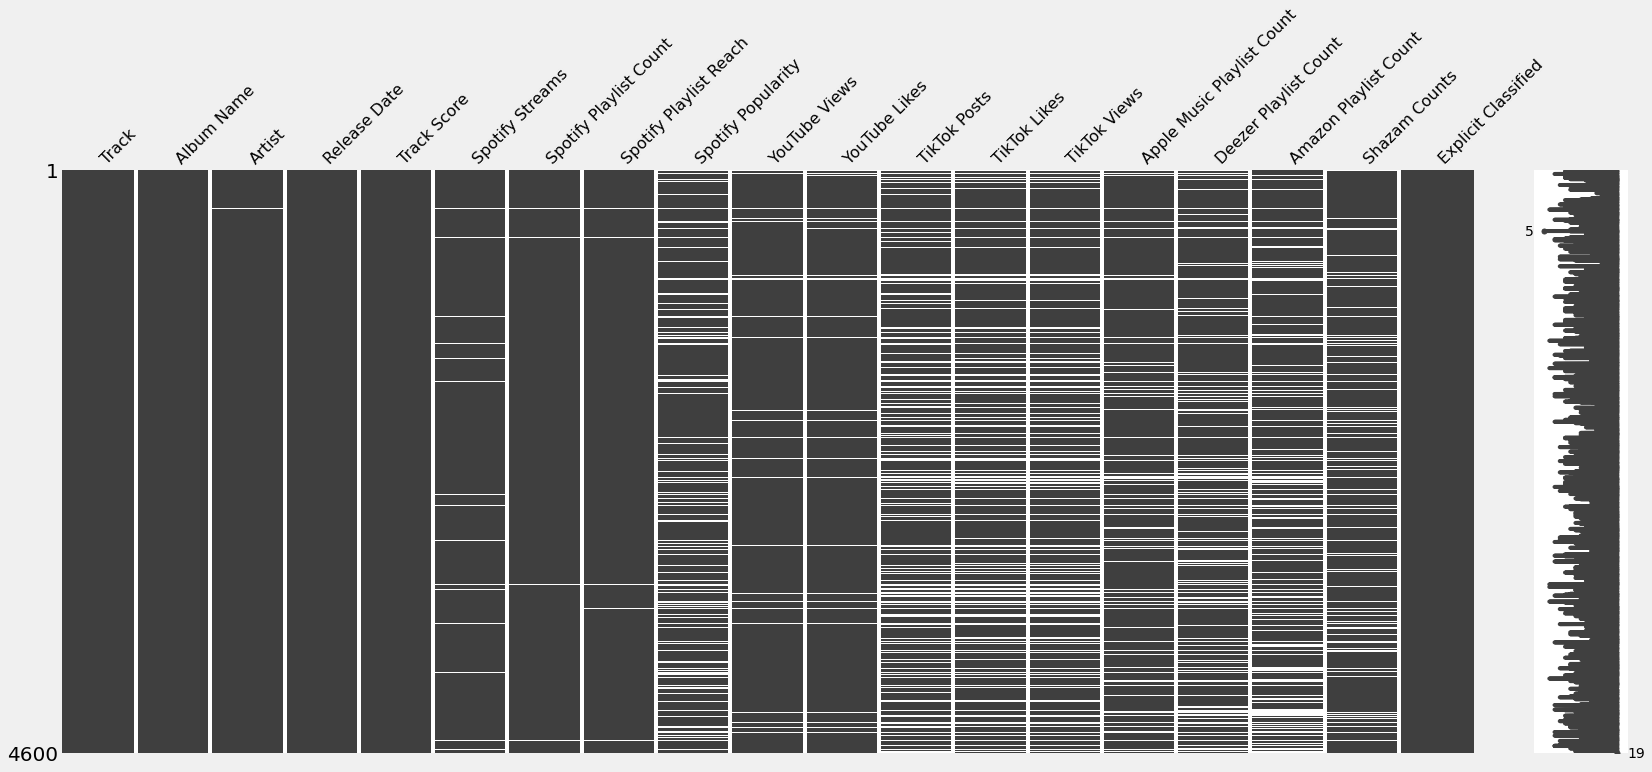

In [13]:
msno.matrix(df)

# Convert the object type to float in order to perform statistics

In [14]:
def convert_obj_float(data,columns):
    for col in columns:
        if data[col].dtype==object:
            df[col]=df[col].str.replace(',','').astype(float)
    return data.head()

In [15]:
columns_to_convert=['Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views',
                    'YouTube Likes','TikTok Views','TikTok Posts','TikTok Likes','Shazam Counts']

convert_obj_float(df,columns_to_convert)

,Track,Album Name,Artist,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Shazam Counts,Explicit Classified
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,210.0,62.0,114.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,188.0,67.0,111.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,190.0,136.0,172.0,5285340.0,1
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,394.0,264.0,210.0,11822942.0,0
4,Houdini,Houdini,Eminem,5/31/2024,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,182.0,82.0,105.0,457017.0,1


# Add a column for Year and Month release

In [16]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')
#Create a new column with the release year
df['Release Year']=df['Release Date'].dt.year
df['Release Month']=df['Release Date'].dt.month_name()

#drop release date
df.drop(['Release Date'],axis=1,inplace=True)

In [17]:
df['Track Score'].max()

725.4

# Fill NaN values

Fill the NaN values with the median

In [18]:
df = df.fillna(df.median())

C:\Users\chris\AppData\Local\Temp\ipykernel_1772\3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


# Add a column for total streams and one for totale playlist counts

In [19]:
df['Total Streams']=df['Spotify Streams']+df['YouTube Views']+df['TikTok Views']

df['Total Playlist Count']=df['Spotify Playlist Count']+df['Apple Music Playlist Count']+df['Deezer Playlist Count']+df['Amazon Playlist Count']

In [20]:
df.head()

,Track,Album Name,Artist,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Shazam Counts,Explicit Classified,Release Year,Release Month,Total Streams,Total Playlist Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,210.0,62.0,114.0,2669262.0,0,2024,April,5.807028e+09,31102.0
1,Not Like Us,Not Like Us,Kendrick Lamar,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,188.0,67.0,111.0,1118279.0,1,2024,May,6.483899e+08,28479.0
2,i like the way you kiss me,I like the way you kiss me,Artemas,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,190.0,136.0,172.0,5285340.0,1,2024,March,4.093029e+09,54829.0
3,Flowers,Flowers - Single,Miley Cyrus,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,394.0,264.0,210.0,11822942.0,0,2023,January,1.773111e+10,270670.0
4,Houdini,Houdini,Eminem,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,2.653441e+07,2.659172e+08,182.0,82.0,105.0,457017.0,1,2024,May,4.503261e+08,7592.0


# Check for duplicates

In [21]:
df.duplicated().sum()

2

In [22]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

# Remove 2024 song since 2024 is not finished yet

In [23]:
not_2024=df[df['Release Year']<2024].reset_index()
not_2024.drop(['index'],axis=1,inplace=True)
not_2024.head()

,Track,Album Name,Artist,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Shazam Counts,Explicit Classified,Release Year,Release Month,Total Streams,Total Playlist Count
0,Flowers,Flowers - Single,Miley Cyrus,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,394.0,264.0,210.0,11822942.0,0,2023,January,1.773111e+10,270670.0
1,Lovin On Me,Lovin On Me,Jack Harlow,410.1,6.706654e+08,105892.0,175421034.0,83.0,1.311481e+08,1392593.0,4202367.0,2.149435e+08,2.938687e+09,138.0,86.0,152.0,4517131.0,0,2023,November,3.740500e+09,106268.0
2,bathroom floor,bathroom floor,Kids With Buns,301.6,2.971850e+05,277.0,24445.0,12.0,6.736502e+09,16785489.0,3.0,1.088000e+03,2.223400e+04,1.0,15.0,17.0,3288.0,0,2022,October,6.736822e+09,310.0
3,LALA,LALA - Single,Myke Towers,299.9,9.256556e+08,103605.0,79944921.0,79.0,9.343020e+08,4294166.0,11054500.0,5.217251e+08,7.499234e+09,94.0,60.0,83.0,2765808.0,0,2023,March,9.359192e+09,103842.0
4,greedy,greedy,Tate McRae,293.7,1.258570e+09,105218.0,198845580.0,87.0,1.416468e+08,1514837.0,2294429.0,4.193192e+08,5.456156e+09,207.0,188.0,150.0,6973652.0,1,2023,September,6.856373e+09,105763.0


# Describe dataset

In [24]:
df.describe()

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Shazam Counts,Explicit Classified,Release Year,Total Streams,Total Playlist Count
count,4598.000000,4.598000e+03,4598.000000,4.598000e+03,4598.000000,4.598000e+03,4.598000e+03,4.598000e+03,4.598000e+03,4.598000e+03,4598.000000,4598.000000,4598.000000,4.598000e+03,4598.000000,4598.000000,4.598000e+03,4598.000000
mean,41.850892,4.423060e+08,58985.167029,2.319373e+07,64.110918,3.857353e+08,2.816064e+06,7.502611e+05,9.432728e+07,9.706000e+08,51.366464,28.852110,23.431057,2.319603e+06,0.279034,2020.617225,1.798641e+09,59088.816659
std,38.550706,5.328602e+08,70679.706520,2.948599e+07,14.766204,6.810648e+08,4.454401e+06,2.134201e+06,4.891039e+08,5.230696e+09,67.678686,49.037877,23.084704,5.675627e+06,0.448573,3.612041,5.357489e+09,70763.001076
min,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,1.000000,1.000000,1.000000,1.000000e+00,0.000000,1987.000000,4.764400e+06,17.000000
25%,23.300000,7.315308e+07,7017.250000,4.896219e+06,62.000000,4.576491e+07,4.486530e+05,6.742500e+04,9.398120e+06,9.362825e+07,12.000000,7.000000,10.000000,2.884645e+05,0.000000,2019.000000,3.883147e+08,7044.750000
50%,29.900000,2.398507e+08,32312.500000,1.325948e+07,67.000000,1.482696e+08,1.257935e+06,1.822000e+05,2.653441e+07,2.659172e+08,28.000000,15.000000,17.000000,8.545840e+05,0.000000,2022.000000,9.202146e+08,32372.500000
75%,44.475000,6.118920e+08,84952.750000,2.931328e+07,71.000000,4.202808e+08,3.354939e+06,4.603338e+05,6.729765e+07,6.307454e+08,60.000000,30.000000,28.000000,2.243324e+06,1.000000,2023.000000,2.029485e+09,85044.000000
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11,859.000000,632.000000,210.000000,2.197945e+08,1.000000,2024.000000,2.332552e+11,591999.000000


In [25]:
df.describe(include='object')

,Track,Album Name,Artist,Release Month
count,4598,4598,4593,4598
unique,4370,4005,1999,12
top,Danza Kuduro - Cover,Un Verano Sin Ti,Taylor Swift,May
freq,13,20,63,511


In [26]:
not_2024.describe(include='object')

,Track,Album Name,Artist,Release Month
count,3905,3905,3905,3905
unique,3726,3435,1762,12
top,Cake By The Ocean - Cover,Un Verano Sin Ti,Drake,January
freq,9,20,61,431


In [27]:
df.shape

(4598, 22)

# FAST EDA

# Data Visualization

In [28]:
month_counts=not_2024['Release Month'].value_counts()

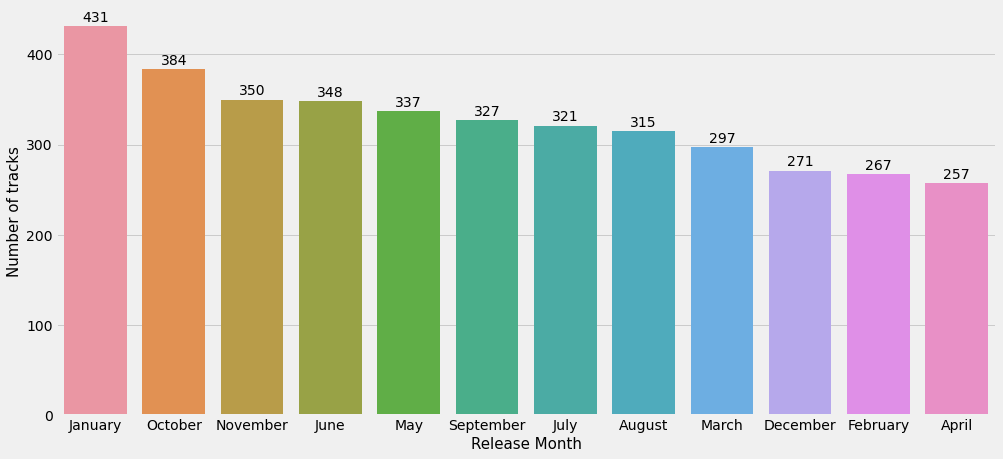

In [29]:
plt.figure(figsize=(15,7))
barplot=sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xlabel('Release Month',fontsize=15)
plt.ylabel('Number of tracks',fontsize=15)
for index, value in enumerate(month_counts.values):
    barplot.text(index, value + 5, str(value), color='black', ha="center")
plt.savefig(path+os.sep+'months.png',dpi=300,bbox_inches='tight')

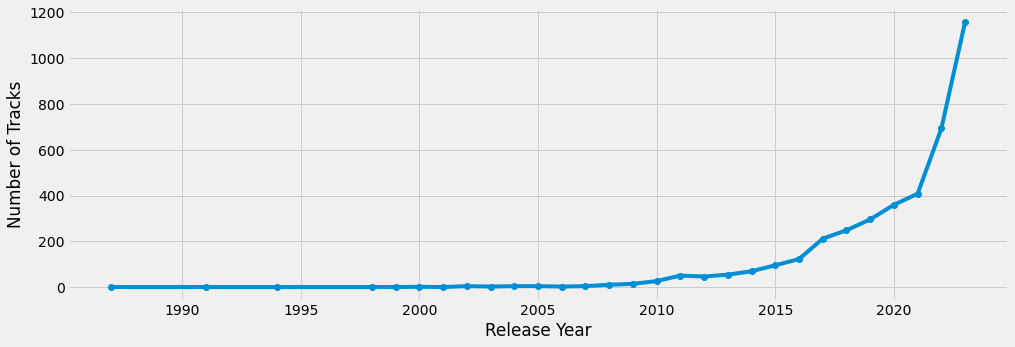

In [30]:
plt.figure(figsize=(15,5))
not_2024.groupby('Release Year')['Track'].count().plot(kind='line',marker='o')
plt.ylabel('Number of Tracks')
plt.savefig(path+os.sep+'num_tracks_year.png',dpi=300,bbox_inches='tight')

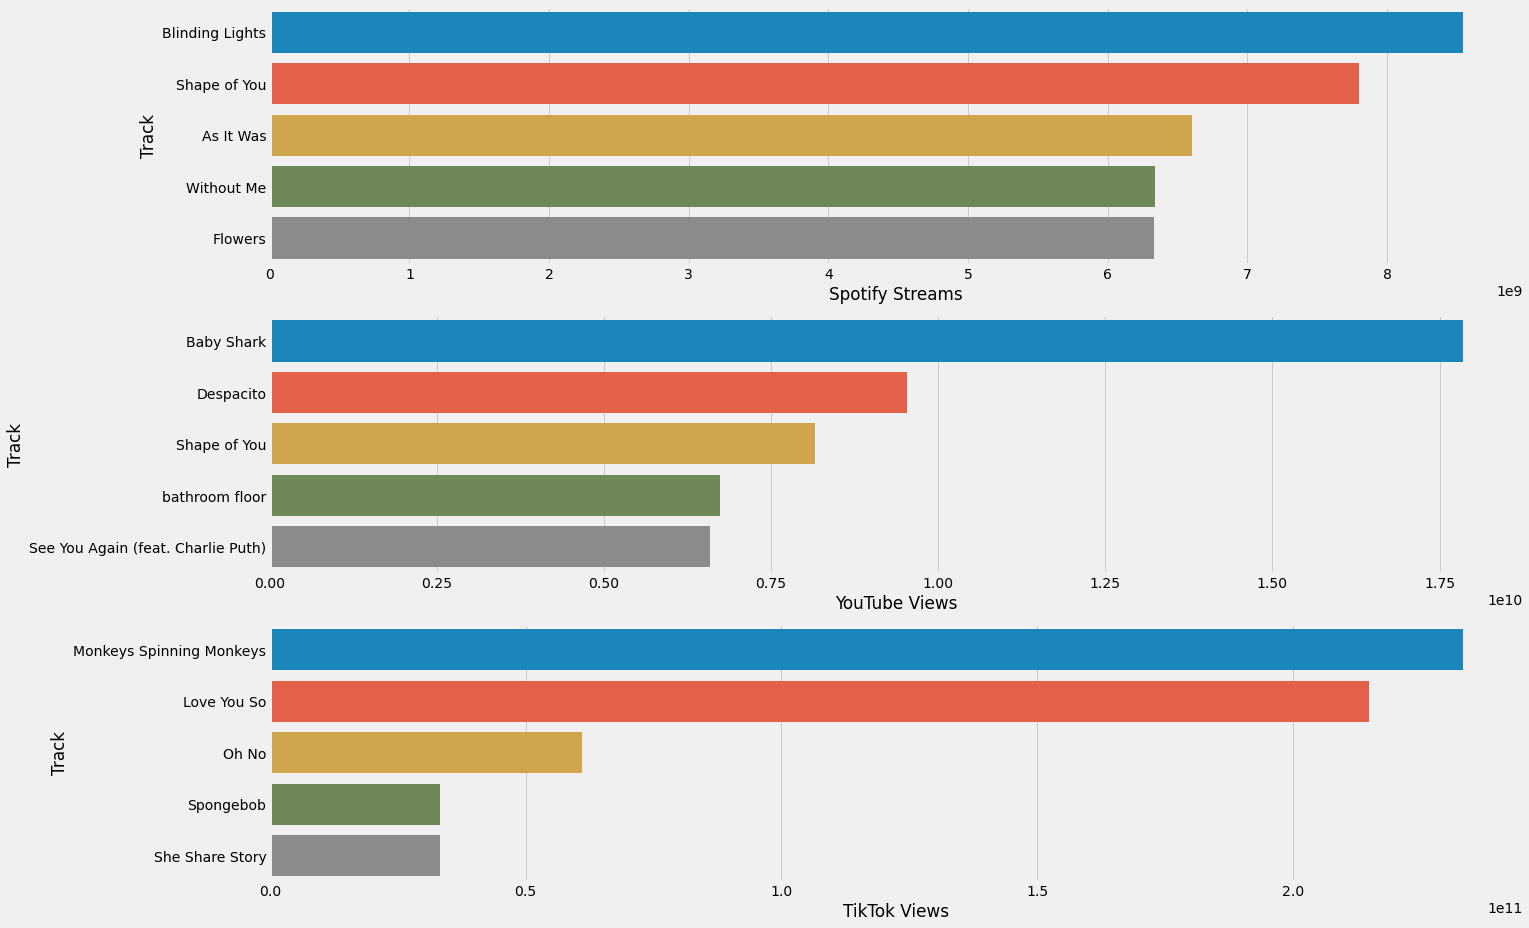

In [31]:
song_streams=df.groupby('Track',as_index=False).agg({'Spotify Streams':'sum','YouTube Views':'sum',
                                                          'TikTok Views':'mean','Track Score':'mean'})
fig, ax = plt.subplots(figsize=(20,15), nrows=3, ncols=1)

#the two most streamed songs are danza kuduro-cover and Cake By The Ocean-cover. However these refer to a sample of covers
#and not to a single track so we will discard them by selecting data[2:7]
sns.barplot(x='Spotify Streams',y='Track',data=song_streams.sort_values(by='Spotify Streams',ascending=False)[2:7],orient='h',ax=ax[0])
sns.barplot(x='YouTube Views',y='Track',data=song_streams.sort_values(by='YouTube Views',ascending=False).head(5),orient='h',ax=ax[1])
sns.barplot(x='TikTok Views',y='Track',data=song_streams.sort_values(by='TikTok Views',ascending=False).head(5),orient='h',ax=ax[2])

fig.savefig(path+os.sep+'most_streamed_tracks.png',dpi=200,bbox_inches='tight')

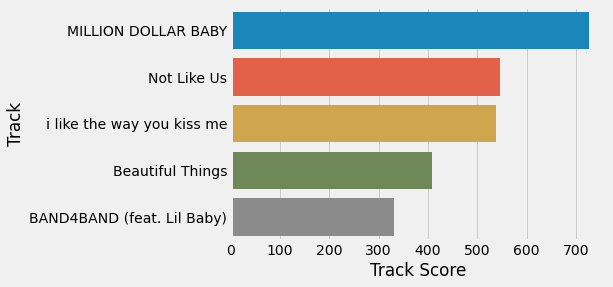

In [32]:
sns.barplot(x='Track Score',y='Track',data=song_streams.sort_values(by='Track Score',ascending=False).head(5))
plt.savefig(path+os.sep+'best_tracks.png',dpi=200,bbox_inches='tight')

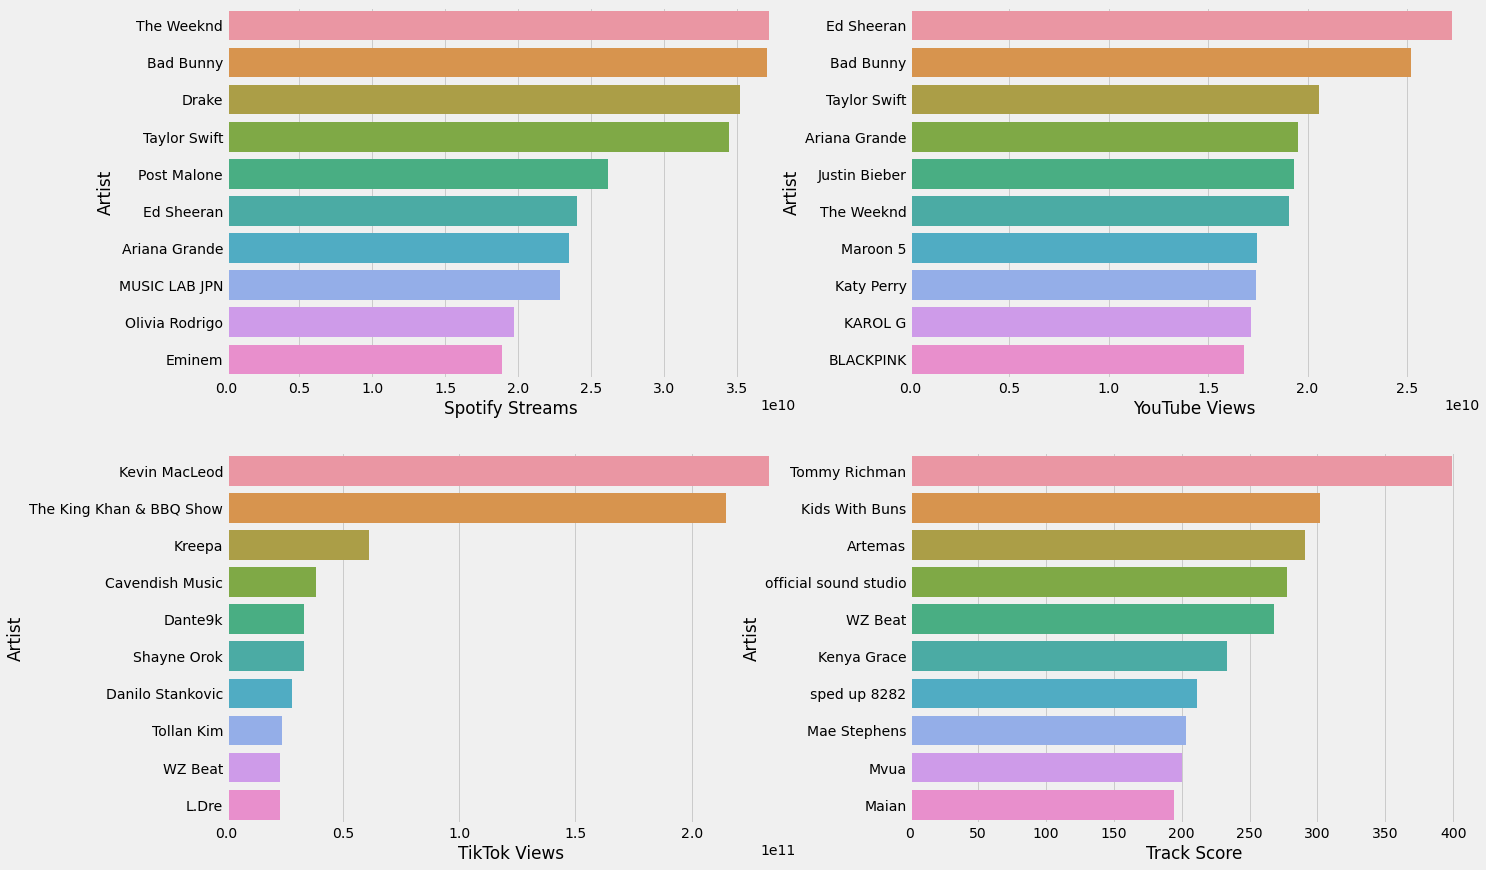

In [33]:
artist_streams=df.groupby('Artist',as_index=False).agg({'Spotify Streams':'sum','YouTube Views':'sum',
                                                          'TikTok Views':'mean','Track Score':'mean'})

fig, ax = plt.subplots(figsize=(20,14), nrows=2, ncols=2)
sns.barplot(y='Artist',x='Spotify Streams',data=artist_streams.sort_values(by='Spotify Streams',ascending=False).head(10),orient='h',ax=ax[0,0])

sns.barplot(y='Artist',x='YouTube Views',data=artist_streams.sort_values(by='YouTube Views',ascending=False).head(10),orient='h',ax=ax[0,1])

sns.barplot(y='Artist',x='TikTok Views',data=artist_streams.sort_values(by='TikTok Views',ascending=False).head(10),orient='h',ax=ax[1,0])

sns.barplot(y='Artist',x='Track Score',data=artist_streams.sort_values(by='Track Score',ascending=False).head(10),orient='h',ax=ax[1,1])

fig.savefig(path+os.sep+'most_streamed_artists.png',dpi=300,bbox_inches='tight')

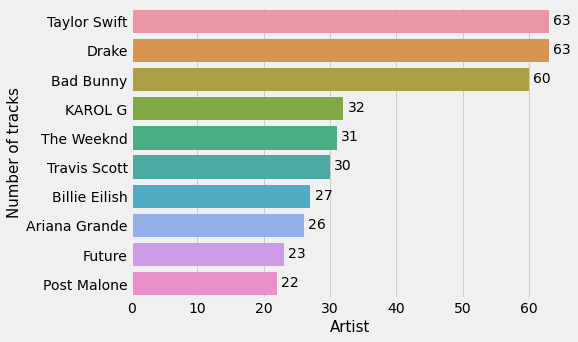

In [34]:
artist_counts=df['Artist'].value_counts().head(10)
plt.figure(figsize=(7,5))
barplot=sns.barplot(y=artist_counts.index, x=artist_counts.values,orient='h')
plt.xlabel('Artist',fontsize=15)
plt.ylabel('Number of tracks',fontsize=15)
for index, value in enumerate(artist_counts.values):
    barplot.text(value+2,index+0.1, str(value), color='black', ha="center")
plt.savefig(path+os.sep+'artists_tracks.png',dpi=300,bbox_inches='tight')

In [35]:
years_tracks=not_2024.groupby('Release Year',as_index=False)[['Spotify Streams','YouTube Views','TikTok Views']].agg(sum)

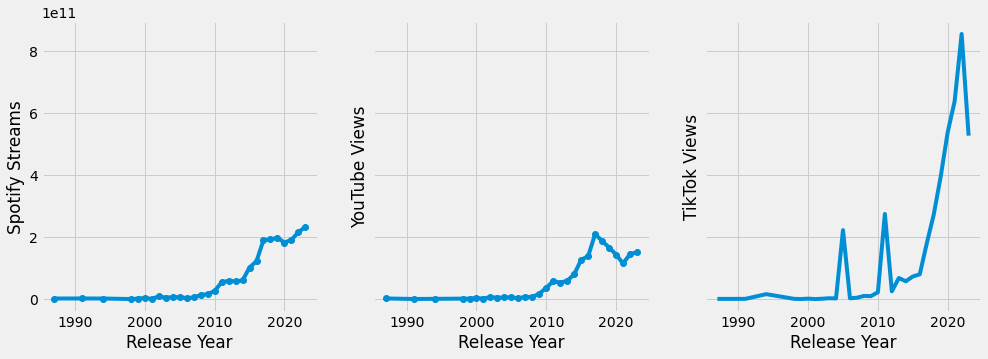

In [36]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,5),sharey=True,sharex=True)
ax[0].plot(years_tracks['Release Year'],years_tracks['Spotify Streams'],label='Spotify Streams',marker='o')
ax[0].set_ylabel('Spotify Streams')
ax[0].set_xlabel('Release Year')

ax[1].plot(years_tracks['Release Year'],years_tracks['YouTube Views'],label='YouTube Views',marker='o')
ax[1].set_ylabel('YouTube Views')
ax[1].set_xlabel('Release Year')

ax[2].plot(years_tracks['Release Year'],years_tracks['TikTok Views'],label='TikTok Views')
ax[2].set_ylabel('TikTok Views')
ax[2].set_xlabel('Release Year')

fig.savefig(path+os.sep+'platforms_streams_years.png',dpi=300,bbox_inches='tight')

<AxesSubplot:ylabel='TikTok Views'>

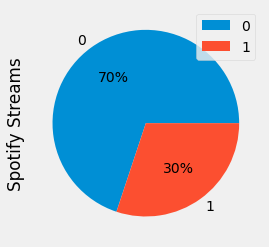

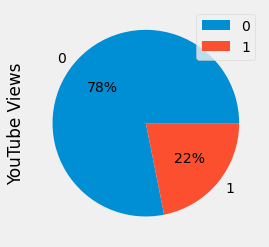

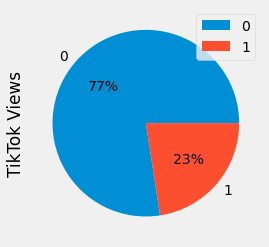

In [37]:
df.groupby('Explicit Classified').sum().plot(kind='pie',y='Spotify Streams',autopct='%1.0f%%')
df.groupby('Explicit Classified').sum().plot(kind='pie',y='YouTube Views',autopct='%1.0f%%')
df.groupby('Explicit Classified').sum().plot(kind='pie',y='TikTok Views',autopct='%1.0f%%')

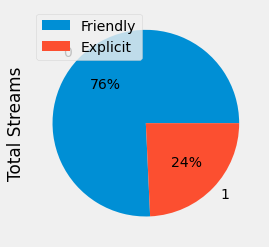

In [38]:
df.groupby('Explicit Classified').sum().plot(kind='pie',y='Total Streams',autopct='%1.0f%%')
plt.legend(['Friendly','Explicit'], loc="upper left")
plt.savefig(path+os.sep+'class_pie.png',dpi=200,bbox_inches='tight')

In [39]:
explicit_tracks=not_2024[not_2024['Explicit Classified']==1]
friendly_tracks=not_2024[not_2024['Explicit Classified']==0]

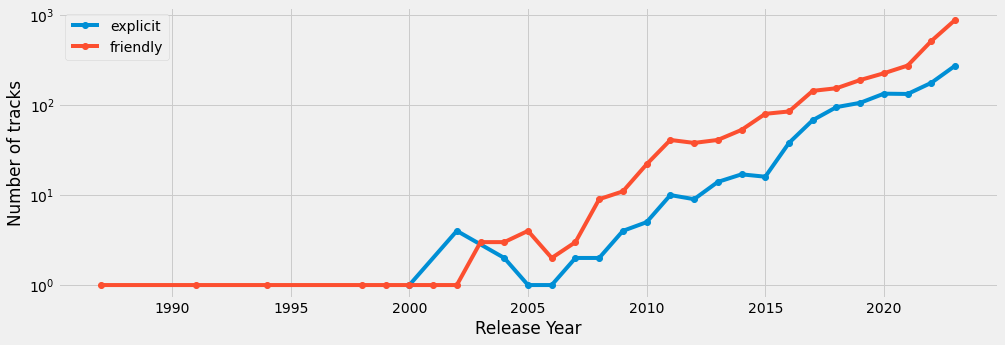

In [40]:
plt.figure(figsize=(15,5))
explicit_tracks.groupby('Release Year')['Track'].count().plot(kind='line',marker='o',label='explicit')
friendly_tracks.groupby('Release Year')['Track'].count().plot(kind='line',marker='o',label='friendly')
plt.ylabel('Number of tracks')
plt.yscale('log')
plt.legend()
plt.savefig(path+os.sep+'expl_friend_years.png',dpi=300,bbox_inches='tight')

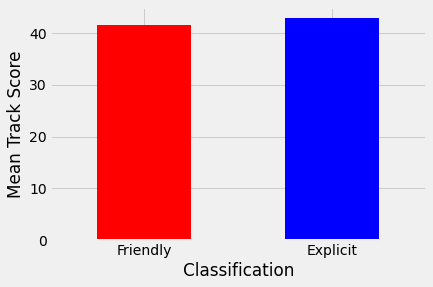

In [41]:
df.groupby('Explicit Classified')['Track Score'].mean().plot(kind='bar',color=['red','blue'])
tick_locations_x=[0,1]
tick_labels_x=['Friendly','Explicit']
plt.xticks(tick_locations_x,tick_labels_x,rotation=0)
plt.xlabel('Classification')
plt.ylabel('Mean Track Score')
plt.savefig(path+os.sep+'track_score_class.png',dpi=300,bbox_inches='tight')

# Correlation analysis

In order to study the correlation between variables I need to convert the categorical variable "Explicit Classified" into 0/1 variable.
I can do this by using pandas.get_dummies method.

In [42]:
df1=pd.get_dummies(df['Explicit Classified'])
df1.rename(columns={0:"Friendly Track",1:"Explicit Track"},inplace=True)

In [43]:
df_corr=pd.concat([df,df1],axis=1)
df_corr.drop(['Explicit Classified'],axis=1,inplace=True)
df_corr.head()

,Track,Album Name,Artist,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Shazam Counts,Release Year,Release Month,Total Streams,Total Playlist Count,Friendly Track,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,210.0,62.0,114.0,2669262.0,2024,April,5.807028e+09,31102.0,1,0
1,Not Like Us,Not Like Us,Kendrick Lamar,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,188.0,67.0,111.0,1118279.0,2024,May,6.483899e+08,28479.0,0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,190.0,136.0,172.0,5285340.0,2024,March,4.093029e+09,54829.0,0,1
3,Flowers,Flowers - Single,Miley Cyrus,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,394.0,264.0,210.0,11822942.0,2023,January,1.773111e+10,270670.0,1,0
4,Houdini,Houdini,Eminem,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,2.653441e+07,2.659172e+08,182.0,82.0,105.0,457017.0,2024,May,4.503261e+08,7592.0,0,1


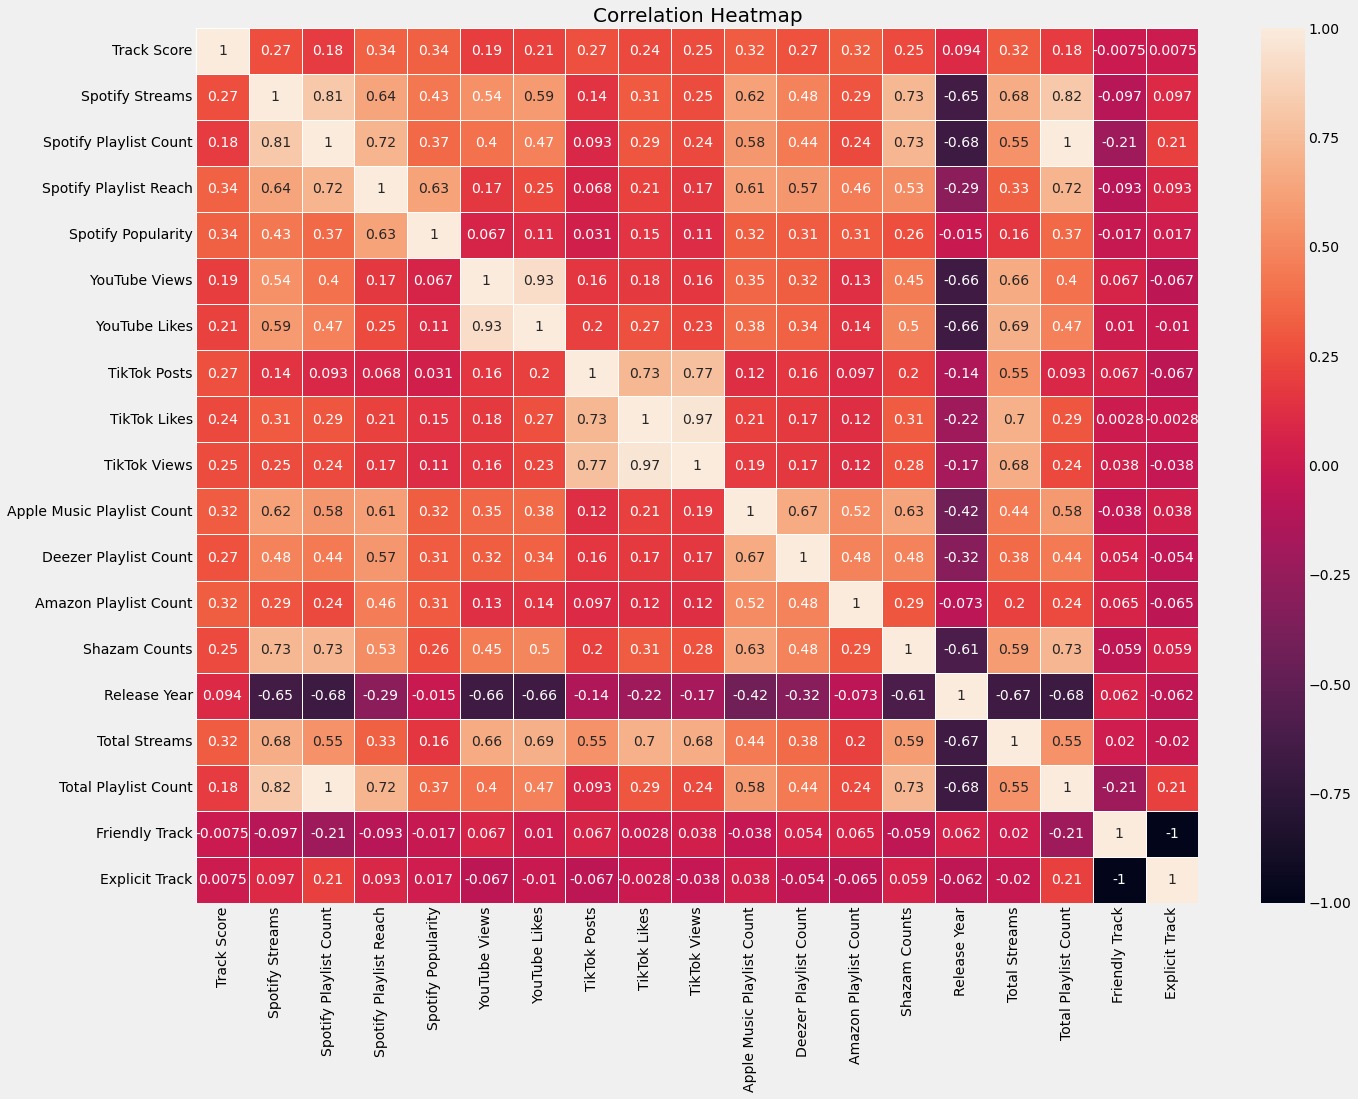

In [44]:
#Use Spearman instead of Pearson because data should be normally distributed..
correlation_matrix = df_corr.corr(method='spearman')

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap',fontsize=20)
plt.savefig(path+os.sep+'df_corr.png',dpi=300,bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='TikTok Likes', ylabel='TikTok Views'>

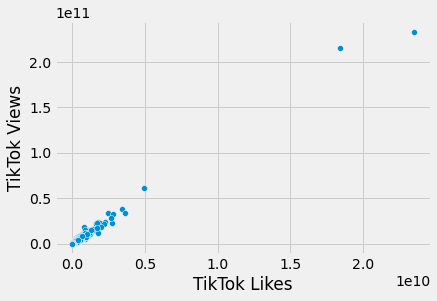

In [45]:
sns.scatterplot(x='TikTok Likes', y='TikTok Views', data=df)

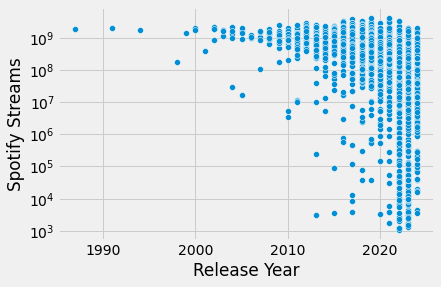

In [46]:
sns.scatterplot(x='Release Year', y='Spotify Streams', data=df)
plt.yscale('log')